In [14]:
import mlflow
import os
import pandas as pd

In [15]:
dataset_name="jackson"
pred_target="ERStatus"
experiment_name = f"san_{dataset_name}_{pred_target}"
mlflow.set_tracking_uri("file:///Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/mlruns/")

In [52]:
# Collect attribute configs names
attribute_configs_path = "/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/configs/attribute_configs"
attribute_configs = os.listdir(attribute_configs_path)
attribute_configs = [os.path.splitext(config)[0] for config in attribute_configs if config.endswith(".yaml")]

# Collect concept configs names
concept_configs_path = "/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/configs/concept_configs"
concept_configs = os.listdir(concept_configs_path)
concept_configs = [os.path.splitext(config)[0] for config in concept_configs if config.endswith(".yaml")]

# Collect pretrain configs
pretrain_configs_path = "/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/configs/pretrain_model_configs"
pretrain_configs = os.listdir(pretrain_configs_path)

In [16]:
# Define inputs
concept = "concept_1_radius"
attribute_config = "all_X_cols"
randomize = "False"
split_strategy = "split_basel_leave_zurich_as_external"
run_type = "pretrain_concept"
metric = "metrics.best_val_balanced_accuracy"

# Define query for MLFlow
query = f"""\
    params.concept = "{concept}" and \
    params.run_type = "{run_type}" and \
    params.split_strategy = "{split_strategy}" and \
    params.attribute_config = "{attribute_config}" and \
    params.randomize = "{randomize}"
    """

# Query
df = mlflow.search_runs(
        experiment_names=[experiment_name],
        filter_string=query
)
df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.best_val_balanced_accuracy,metrics.test_best_val_weighted_f1_score_balanced_accuracy,metrics.train_weighted_f1_score,metrics.test_best_val_balanced_accuracy_weighted_recall,...,params.hidden_channels,params.seed,params.scheduler,params.normalized_with,params.run_type,tags.mlflow.user,tags.mlflow.source.git.commit,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name
0,24551ccc46974bbb86e67a0e3ff24614,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:20:28.417000+00:00,2023-11-30 10:23:43.324000+00:00,0.661975,0.627847,0.735474,0.694864,...,64,1,"['ExponentialLR', 0.98]",normalized_with_min_max,pretrain_concept,santiago,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,chill-owl-867,6_pretrain/scripts/pretrain_concept.py
1,21d49d8c423340c18174ff0d09de7385,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:18:57.249000+00:00,2023-11-30 10:23:59.886000+00:00,0.686975,0.674855,0.724207,0.574018,...,64,0,"['ExponentialLR', 0.98]",normalized_with_min_max,pretrain_concept,santiago,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,overjoyed-slug-911,6_pretrain/scripts/pretrain_concept.py
2,bb28a09c07c54ddf9c366a5e0a8c625b,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:18:10.392000+00:00,2023-11-30 10:23:38.501000+00:00,0.703782,0.664093,0.802972,0.737160,...,64,1,"['ExponentialLR', 0.98]",normalized_with_min_max,pretrain_concept,santiago,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,chill-owl-867,6_pretrain/scripts/pretrain_concept.py
3,9a36f5ddf0a449eaae03942156d10b40,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:15:32.898000+00:00,2023-11-30 10:20:36.933000+00:00,0.620168,0.682819,0.745209,0.782477,...,64,1,"['ExponentialLR', 0.98]",normalized_with_min_max,pretrain_concept,santiago,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,chill-owl-867,6_pretrain/scripts/pretrain_concept.py
4,31bb4118c8164f5e8d3b370a370d23d9,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:14:21.942000+00:00,2023-11-30 10:21:58.065000+00:00,0.668067,0.618002,0.790975,0.755287,...,64,1,"['ExponentialLR', 0.98]",normalized_with_min_max,pretrain_concept,santiago,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,chill-owl-867,6_pretrain/scripts/pretrain_concept.py
5,0b87690e3d9141998b92f6402fd3ab28,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:12:07.435000+00:00,2023-11-30 10:17:49.675000+00:00,0.722479,0.642133,0.794236,0.510574,...,64,0,"['ExponentialLR', 0.98]",normalized_with_min_max,pretrain_concept,santiago,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,overjoyed-slug-911,6_pretrain/scripts/pretrain_concept.py
6,c92e7951d27c4a978dbcd4cfde96fcbd,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:11:50.608000+00:00,2023-11-30 10:20:11.349000+00:00,0.591597,0.655357,0.764715,0.516616,...,64,0,"['ExponentialLR', 0.98]",normalized_with_min_max,pretrain_concept,santiago,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,overjoyed-slug-911,6_pretrain/scripts/pretrain_concept.py
7,1ad6fcfd804e4f76939d77acd6e9beaa,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:08:35.551000+00:00,2023-11-30 10:17:01.371000+00:00,0.609034,0.616458,0.792709,0.731118,...,64,1,"['ExponentialLR', 0.98]",normalized_with_min_max,pretrain_concept,santiago,09030da8a5e9e28b8d1090bea683c3f7604d6241,LOCAL,chill-owl-867,6_pretrain/scripts/pretrain_concept.py
8,b2e437b3f19b4975ad395bf51cdd7770,538070382606972004,FINISHED,/Users/santiago/eth/22-2/thesis/data/jackson/p...,2023-11-30 10:08:35.229000+00:00,2023-11-30 10:14:03.333000+00:00,0.663025,0.634894,0.772907,0.634441,...,64,0,"['ExponentialLR', 0.98]",normalized_with_min_max,pretrain_concept,santiago,09030da8a5e9e28b8d1090bea683c3f7

In [158]:
# Group by these (they re the model parameters, importantly excluding seed and folds)
params = [
    'optim',
    'norm',
    'num_layers',
    'n_epoch',
    'gnn',
    'dropout',
    'scaler', 
    'lr',
    'act',
    'scheduler',
    'num_layers_MLP',
    'in_channels',
    'hidden_channels',
    'pool',
    'jk',
    'batch_size',
    'act_first',
    'path_input_config', # Should be one per distribution or group
    'path_input_data' # Should be one for all runs with the same concept
]
params = [f"params.{param}" for param in params]

In [5]:
df.groupby("params.cfg_id")[metric].describe()

,count,mean,std,min,25%,50%,75%,max
params.cfg_id,,,,,,,,
1dc1adf7-95d0-4989-8c20-d5856191ddc7,6.0,0.641842,0.050372,0.591597,0.595956,0.638550,0.682248,0.703782
f56f7691-8d14-4afd-8d47-0c3776dd893f,6.0,0.659384,0.034790,0.620168,0.641597,0.655882,0.662763,0.722479


In [7]:
# Get path to the dataset and config
median_metrics = df.groupby("params.cfg_id")[metric].median().reset_index()

# Get group with the best median
best_params = median_metrics.loc[median_metrics[metric].idxmax()]
median = best_params[metric]

# Use the values from the Series to create a DataFrame for merging
best_params_df = pd.DataFrame([best_params.values], columns=best_params.index)

# Merge with the original DataFrame to locate all runs with the best parameters
best_runs = pd.merge(df, best_params_df, on="params.cfg_id", how='inner', suffixes=(None, "_from_grouped"))
print(
    best_runs["params.path_input_data"].unique()[0] # Should be one unique value
)
print(
    best_runs["params.path_input_config"].unique()[0] # Should be one unique value
)

/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/processed_data/attributed/all_X_cols/concept_1_radius
/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/configs/pretrain_model_configs/f56f7691-8d14-4afd-8d47-0c3776dd893f.yaml


In [8]:
# Pick the the group with the highest median and save its config and the checkpoint closes to the median
print(
    best_runs.loc[(best_runs[metric] - median).abs().idxmin(), "params.path_output_models"]
)

/Users/santiago/eth/22-2/thesis/data/jackson/prediction_tasks/ERStatus/normalized_with_min_max/checkpoints/all_X_cols/concept_1_radius/f56f7691-8d14-4afd-8d47-0c3776dd893f/fold_1/seed_1


In [10]:
# TODO: save tuple of run_ids so that the losses can be visualize in mlflow
best_runs.loc[(best_runs[metric] - median).abs().idxmin(), "run_id"]

'24551ccc46974bbb86e67a0e3ff24614'

Text(0.5, 0.98, 'Netflix Originals - IMDB Scores by Language')

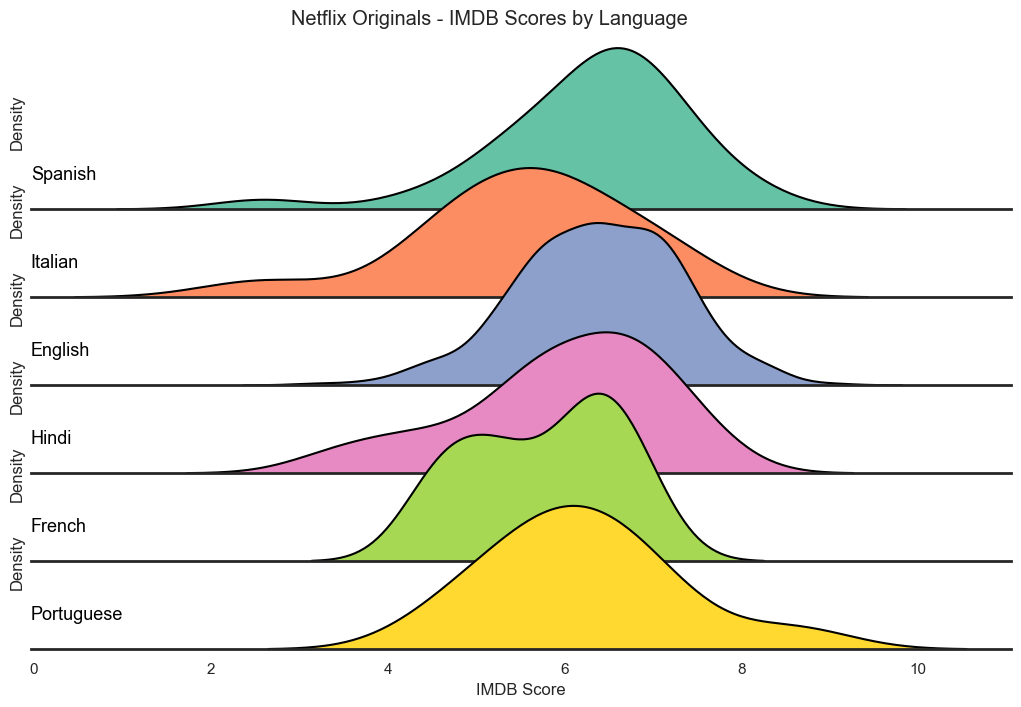

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DATA
url = 'https://gist.githubusercontent.com/Thiagobc23/4ccb4ea1c612d9d68921bf990ce28855/raw/07af955c17d1816aba58dea74d65f60210702a15/film.csv'
df = pd.read_csv(url, index_col='ID')

# Theme
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)

# create a grid with a row for each 'Language'
g = sns.FacetGrid(df, palette=palette, row="Language", hue="Language", aspect=9, height=1.2)

# map df - Kernel Density Plot of IMDB Score for each Language
g.map_dataframe(sns.kdeplot, x="IMDB Score", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="IMDB Score", color='black')

# function to draw labels
def label(x, color, label):
    ax = plt.gca() #get current axis
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
# iterate grid to plot labels
g.map(label, "Language")

# adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-.5)

# remove subplot titles
g.set_titles("")

# remove yticks and set xlabel
g.set(yticks=[], xlabel="IMDB Score")
# remove left spine
g.despine(left=True)
# set title
plt.suptitle('Netflix Originals - IMDB Scores by Language', y=0.98)

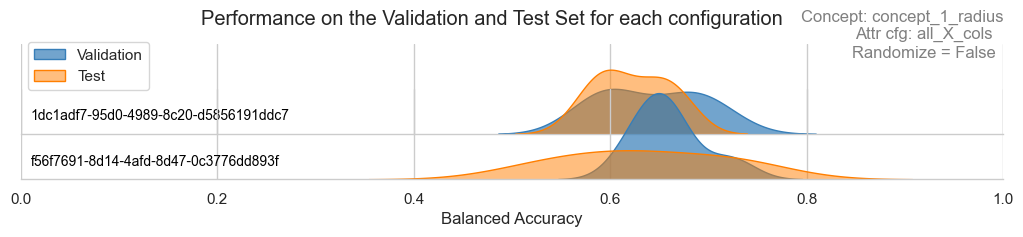

In [125]:
# Theme
metric2 = "metrics.test_best_val_balanced_accuracy_balanced_accuracy"
df2 = df[["params.cfg_id", metric, metric2]]
sns.set_theme(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':1})

# Calculate median for each row based on the first metric
median_order = df2.groupby("params.cfg_id")[metric].median().sort_values().index

# Create a grid with a row for each configuration, ordered by the median of the first metric
g = sns.FacetGrid(df2, row="params.cfg_id", hue="params.cfg_id", aspect=9, height=1.2, xlim=(0, 1), row_order=median_order)

# Map Kernel Density Plot for each configuration
g.map_dataframe(sns.kdeplot, x=metric, color="#377eb8", fill=True, alpha=0.7)

# Map Kernel Density Plot for the second metric
g.map_dataframe(sns.kdeplot, x=metric2, color='#ff7f00', fill=True, alpha=0.5)

# Function to draw labels
def label(x, color, label):
    ax = plt.gca()  # Get current axis
    ax.text(0.01, .2, label, color='black', fontsize=10,
            ha="left", va="center", transform=ax.transAxes)

# Iterate grid to plot labels
g.map(label, "params.cfg_id")

# Adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-0.5)

# Remove subplot titles
g.set_titles("")

# Remove y-axis ticks and label, set x-axis label
g.set(yticks=[], ylabel="", xlabel="Balanced Accuracy")

# Remove left spine
g.despine(left=True)

# Set title
plt.suptitle("Performance on the Validation and Test Set for each configuration", y=0.98)
plt.figtext(0.88, 0.95, f"Concept: {concept}", ha="center", va="center", fontsize=12, color="gray")
plt.figtext(0.9, 0.88, f"Attr cfg: {attribute_config}", ha="center", va="center", fontsize=12, color="gray")
plt.figtext(0.9, 0.8, f"Randomize = {randomize}", ha="center", va="center", fontsize=12, color="gray")

# Customize the legend
legend = plt.legend(title='', loc='upper left')
legend.set_bbox_to_anchor((0.00, 1.6))  
legend.get_frame().set_facecolor('#ffffff')

# Set custom labels
legend_labels = ['Validation', 'Test']
for text, label in zip(legend.get_texts(), legend_labels):
    text.set_text(label)